CARRIVE Isaure & SCHETTER Lou

# Physique Expérimentale - Projet : Freinage magnétique (tube)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import fitutils as fu

## I - Séance 1

### A - Mise en évidence du phénomène d'induction

**Objectif** : L'objectif de cette expérience est de mettre en évidence le phénomème d'induction à l'aide d'un aimant et d'une bobine.

**Materiel utilisé**:
- Aimant
- Bobine
- Oscilloscope
  

**Protocole** : On branche une bobine à l'oscilloscope, et on fait passer un aimant dans la bobine. On réalise cette expérience plusieurs fois dans des conditions différentes : en le faisant passer lentement puis rapidement, en l'approchant sans le faire passer dans la bobine, à différents endroits (au centre, et proche du contour de la bobine).

## **Observations** : On observe plusieurs choses :
- des variations de la tension au bornes de la bobine. Lorsqu'on approche l'aimant, la courbe de la tension varie avec un pic positif et lorsqu'on l'éloigne, la courbe de la tension varie de la même manière mais avec un pic négatif. Cependant, la tension reste constante, lorsque l'aimant est immobile (à l'intérieur ou a l'extérieur).
- des variations de l'amplitude des pics en fonction de la vitesse. Plus on approche rapidement l'aimant, plus les pics vont être hauts (idem quand on l'éloigne).
- absence de variations, en fonction des endroits à l'intérieur de la bobine. Cependant, on remarque que le rayon de la bobine est relativement petit, donc si on avait une bobine avec un diamètre plus grand, il y aurait peut-être des variations.

**Conclusion** : On en déduit que la norme et le sens de la vitesse d'approche de l'aimant ont une influence sur la tension aux bornes de la bobine.

### B - Mesure de la vitesse d'un aimant en chute dans un tube

**Objectif**: L'objectif de cette experience est de mesurer la vitesse d'un aimant tombant dans un tube, en fonction des différentes conditions expérimentales.

**Materiel utilisé**:
- Aimants
- Tubes de diamètres différents
- Oscilloscope
- Bobines
- Cotons pour amortir la chute de l'aimant.
- Potence

**Protocole** : On place un tube verticalement à l'aide d'une potence, on place trois bobines dont deux aux extrémités du tube et la 3ème à des hauteurs différentes entre les deux 1ères. On met les bobines en série, et on les branche à l'oscilloscope. Ces bobines vont nous permetttre de calculer le temps pour que l'aimant parcourt la distance entre les bobines : lorsque l'aimant passera dans une bobine, il y aura un pic de tension positif puis négatif et le moment entre les deux pics marque le temps où l'aimant passe dans la bobine. Avec cette technique, on peut calculer la durée de la chute en faisant la différence entre les deux temps de passage de l'aimant dans chacune des bobines. Enfin, on peut en déduire la vitesse de l'aimant entre les deux bobines.

Pour 1 experience, on repete chaque mesurage 10 fois dans les mêmes conditions. On refait ensuite la même experience en variants certains paramètres.

#### Conditions 1

- Tube en cuivre rayon $R_1$ et de hauteur $H_1$ en cuivre (donc conducteur):
- intervalle de certitude du diamètre [3,0 ; 3,2] $\rightarrow R_1 = ( 1,55 \pm 0,029 )cm$
- intervalle de certitude de la hauteur : [40 ; 41] $\rightarrow H_1 = ( 40,50 \pm 0,29 )cm$
- écart entre bobine 1 et bobine 2 : [14.5 ; 15] $\rightarrow E_{1,1} = (14,75  \pm 0,14 )cm$
- écart entre bobine 1 et bobine 2 : [16 ; 16,5] $\rightarrow E_{1,2} = ( 16,25 \pm 0,14 )cm$

Les incertitudes sur ces mesures sont des incertitudes de type B, liées à l'instrument de mesure (ici la règle) et la précision de l'expérimentateur. Aussi

In [2]:
R1 = 1.55
uR1 = 0.1/np.sqrt(12)
H1 = 40.5
uH1 = 1/np.sqrt(12)
E11 =14.75
uE11 = 0.5/np.sqrt(12)
E12 =16.25
uE12 = 0.5/np.sqrt(12)
print(uR1, uH1, uE11, uE12)

uE = 3/np.sqrt(12)

0.02886751345948129 0.2886751345948129 0.14433756729740646 0.14433756729740646


On réalise 10 fois l'expérience dans les mêmes conditions pour avoir une valeur moyenne de temps qu'il faut à l'aimant pour parcourir les distances entre les aimants $E_{1,1}$ et $E_{1,2}$. Pour l'incertitude sur les valeurs du temps, il y a 2 incertitudes : une incertitude de type B qui est liée à la précision de l'oscilloscope, et une incertitude de type A qui est liée au fait que les mesures ne sont pas toujours exactement les mêmes. Ici on négligera l'incertitude de type B liée a l'oscilloscope.

In [3]:
t11 = np.array([104, 96, 104, 100, 94, 96, 96, 98, 108, 98])
mt11 = np.mean(t11)
ut11 = np.std(t11)/np.sqrt(10)
t12 = np.array([76, 78, 76, 76, 74, 76, 74, 74, 78, 74])
mt12 = np.mean(t12)
ut12 = np.std(t12)/np.sqrt(10)

v11 = E11/mt11
uv11 = v11*np.sqrt( (uE/E11)**2  + (ut11/mt11)**2  )
v12 = E12/mt12
uv12 = v12*np.sqrt( (uE/E12)**2  + (ut12/mt12)**2  )

print(v11, uv11, v12, uv12)

0.14839034205231388 0.008945264894421358 0.21494708994708997 0.01153412837919726


On considère que le tube atteint sa vitesse stationnaire quand il arrive entre les deux dernières bobines. On a donc comme vitesse stationnaire pour cette experience : $V_{s,1} = (0,215 \pm 0,012) cm.ms^{-1} = (2,15 \pm 0,12) m.s^{-1}$ La vitesse entre les deux premières bobines est quant à elle moins précise, en effet la vitesse n'a pas encore atteint son régime stationnaire.

#### Condition 2

Tube en cuivre rayon $R_2$ et de hauteur $H_2$ en cuivre (conducteur):
- intervalle de certitude du diamètre [2,2 ; 2,3] $\rightarrow R_2 = ( 1,150 \pm 0,029 )cm$
- intervalle de certitude de la hauteur : [97 ; 98] $\rightarrow H_2 = ( 97,50 \pm 0,29 )cm$
- écart entre bobine 1 et bobine 2 : [17,5 ; 18,5] $\rightarrow E_{2,1} = ( 18,00 \pm 0,29 )cm$
- écart entre bobine 1 et bobine 2 : [69 ; 73] $\rightarrow E_{2,2} = ( 71,0 \pm  1,2 )cm$


In [4]:
R2 = 1.15
uR2 = 0.1/np.sqrt(12)
H2 = 97.5
uH2 = 1/np.sqrt(12)
E21 = 18
uE21 = 1/np.sqrt(12)
E22 = 71
uE22 = 4/np.sqrt(12)
print(uR2, uH2, uE21, uE22)

0.02886751345948129 0.2886751345948129 0.2886751345948129 1.1547005383792517


In [5]:
t21 = np.array([200, 160, 102, 128, 120, 110, 184, 148, 210])
mt21 = np.mean(t21)
ut21 = np.std(t21)/np.sqrt(10)
t22 = np.array([270, 190, 246, 260, 244, 240, 268, 268, 270])
mt22 = np.mean(t22)
ut22 = np.std(t22)/np.sqrt(10)

v21 = E21/mt21
uv21 = v21*np.sqrt( (uE/E21)**2  + (ut21/mt21)**2  )
v22 = E22/mt22
uv22 = v22*np.sqrt( (uE/E22)**2  + (ut22/mt22)**2  )

print(v21, uv21, v22, uv22)

0.11894273127753303 0.010929408433658305 0.28324468085106386 0.009331137968901402


On considère la vitesse stationnaire la vitesse entre les deux dernières bobines : $V_{2,2} = (0,2832 \pm 0,0093) cm.ms^{-1} = (2,832 \pm 0,093) m.s^{-1}$

**Conclusion** : On voit que la vitesse stationnaire de l'aimant dépend du rayon du tube mais aussi du fait que le tube soit conducteur ou non :
- Plus le tube conducteur a un diamètre est petit, plus la norme de la vitesse sera grande.
- Si le tube est conducteur la chute de l'aimant est ralentie.

## II - Séance 2

Lors de la première séance, on a mis les 3 bobines en parallèle, mais les pics de tensions n'étaient pas faciles à distinguer. Pour cette séance, on a mis la première et la troisième bobine (les deux bobines les plus éloignées) en série, et la deuxième bobine en parallèle pour pouvoir distinguer les pics de tension.
Aussi, nous avons changé d'aimant (étant donné que lors de la première séance on ne voyait pas de grosse variation de vitesse).

### Condition 3

- Tube en plastique (non-conducteur)
- Diamètre [3,5;4] $\rightarrow R_3 = ( 1,875 \pm 0,072 )cm$
- Hauteur : [40;40,2] $\rightarrow H_3 = ( 40,10 \pm 0,56 )cm$
- Ecart bobine 1 - bobine 2 : [13,5;14,5 ] $\rightarrow E_{3,1} = ( 14,00 \pm 0,29)cm$
- Ecart bobine 1 - bobine 2 : [14,5;15,5 ] $\rightarrow E_{3,2} = (15,00 \pm 0,29)cm$


In [6]:
R3 = 1.875
uR3 = 0.25/np.sqrt(12)
H3 = 40.1
uH3 = 0.2/np.sqrt(12)
E31 = 14
uE31 = 1/np.sqrt(12)
E32 = 15
uE32 = 1/np.sqrt(12)
print(uR3, uH3, uE31, uE32)

0.07216878364870323 0.05773502691896258 0.2886751345948129 0.2886751345948129


In [7]:
t31 = np.array([80, 82, 76, 82, 76, 70, 74, 78, 72, 76 ])
mt31 = np.mean(t31)
ut31 = np.std(t31)/np.sqrt(10)
t32 = np.array([65, 60, 62, 64, 56, 54, 60, 58, 61, 60 ])
mt32 = np.mean(t32)
ut32 = np.std(t32)/np.sqrt(10)

v31 = E31/mt31
uv31 = v31*np.sqrt( (uE/E31)**2  + (ut31/mt31)**2  )
v32 = E32/mt32
uv32 = v32*np.sqrt( (uE/E32)**2  + (ut32/mt32)**2  )

print(v31, uv31, v32, uv32)

0.18276762402088775 0.011663710119669688 0.25 0.015034682127223932



Vitesse stationnaire : $V_{3,2} = ( 0,250 \pm 0,015) cm.ms^{-1} = ( 2,50 \pm  0,15 ) m.s^{-1}$

### Condition 4

- Tube en laiton (conducteur)
- Diamètre [2,1;2,4] $\rightarrow R_4 = ( 1,125  \pm 0,043 )cm$
- Hauteur : [97,1; 97,7] $\rightarrow H_4 = (97,40 \pm 0,17 )cm$
- Ecart bobine 1 - bobine 2 : [9;11 ] $\rightarrow E_{4,1} = ( 10,00 \pm 0,58)cm$
- Ecart bobine 2 - bobine 3 : [75;77] $\rightarrow E_{4,2} = ( 76,00 \pm 0,58 )cm$

In [8]:
R4 = 1.125
uR4 = 0.15/np.sqrt(12)
H4 = 97.4
uH4 = 0.6/np.sqrt(12)
E41 = 10
uE41 = 2/np.sqrt(12)
E42 = 76
uE42 = 2/np.sqrt(12)
print(uR4, uH4, uE41, uE42)

0.04330127018922193 0.17320508075688773 0.5773502691896258 0.5773502691896258


In [9]:
t41 = np.array([190,  244, 160, 210, 180, 230, 230, 240, 230, 220])
mt41 = np.mean(t41)
ut41 = np.std(t41)/np.sqrt(10)
t42 = np.array([1040, 1030, 1020 ,1030, 1055, 1030, 1050, 1070, 1030, 1090 ])
mt42 = np.mean(t42)
ut42 = np.std(t42)/np.sqrt(10)

v41 = E41/mt41
uv41 = v41*np.sqrt( (uE/E41)**2  + (ut41/mt41)**2  )
v42 = E42/mt42
uv42 = v42*np.sqrt( (uE/E42)**2  + (ut42/mt42)**2  )

print(v41, uv41, v42, uv42)

0.046860356138706656 0.004456909262082801 0.07276208712302537 0.0009472158823574359


Vitesse stationnaire : $V_{4,2} = (0,07276 \pm 0,00095) cm.ms^{-1} = ( 0,7276 \pm  0,0095) m.s^{-1}$

### Condition 5

- Tube en cuivre (conducteur)
- Diamètre [2,0 ; 2,2] $\rightarrow R_5 = ( 1,050 \pm 0,029 )cm$
- Hauteur : [40,1 ; 40,3] $\rightarrow H_5 = ( 40,200 \pm 0,058 )cm$
- Ecart bobine 1 - bobine 2 : [3 ; 5] $\rightarrow E_{5,1} = ( 4,00 \pm 0,58 )cm$
- Ecart bobine 2 - bobine 3 : [32 ; 34] $\rightarrow E_{5,2} = ( 33,00 \pm 0,58 )cm$

In [10]:
R5 = 1.05
uR5 = 0.1/np.sqrt(12)
H5 = 40.2
uH5 = 0.2/np.sqrt(12)
E51 = 4
uE51 = 2/np.sqrt(12)
E52 = 33
uE52 = 2 /np.sqrt(12)
print(uR5, uH5, uE51, uE52)

0.02886751345948129 0.05773502691896258 0.5773502691896258 0.5773502691896258


In [11]:
t51 = np.array([200, 200, 220, 220, 200, 200, 220, 240, 220, 220])
mt51 = np.mean(t51)
ut51 = np.std(t51)/np.sqrt(10)
t52 = np.array([1880, 1810, 1870, 1740, 1690, 1900, 1720, 1740, 1780, 1780])
mt52 = np.mean(t52)
ut52 = np.std(t52)/np.sqrt(10)

v51 = E51/mt51
uv51 = v51*np.sqrt( (uE/E51)**2  + (ut51/mt51)**2  )
v52 = E52/mt52
uv52 = v52*np.sqrt( (uE/E52)**2  + (ut52/mt52)**2  )

print(v51, uv51, v52, uv52)

0.018691588785046728 0.004062276574766729 0.018425460636515914 0.0005325911537010777


Vitesse stationnaire : $V_{5,2} = (0,01843 \pm 0,00053) cm.ms^{-1} = ( 0,1843 \pm 0,0053 ) m.s^{-1}$

### Condition 6

- Tube en cuivre (conducteur)
- Diamètre [2,7 ; 3,0] $\rightarrow R_6 = ( 1,425 \pm 0,043 )cm$
- Hauteur : [40,1 ; 40,3] $\rightarrow H_6 = (40,200  \pm 0,058 )cm$
- Ecart bobine 1 - bobine 2 : [3 ; 5] $\rightarrow E_{6,1} = ( 4,00 \pm 0,58)cm$
- Ecart bobine 1 - bobine 2 : [31,5 ; 33,5] $\rightarrow E_{6,2} = (32,5 \pm 0,58)cm$

In [12]:
R6 =1.35
uR6 = 0.15/np.sqrt(12)
H6 = 40.2
uH6 = 0.2/np.sqrt(12)
E61 = 4
uE61 = 2/np.sqrt(12)
E62 = 32.5
uE62 = 2/np.sqrt(12)
print(uR6, uH6, uE61, uE62)

0.04330127018922193 0.05773502691896258 0.5773502691896258 0.5773502691896258


In [13]:
t61 = np.array([100, 80, 90, 50, 80, 60, 60, 70, 100, 100])
mt61 = np.mean(t61)
ut61 = np.std(t61)/np.sqrt(10)
t62 = np.array([960, 960, 950, 820, 810, 920, 850, 870, 920, 940 ])
mt62 = np.mean(t62)
ut62 = np.std(t62)/np.sqrt(10)

v61 = E61/mt61
uv61 = v61*np.sqrt( (uE/E61)**2  + (ut61/mt61)**2  )
v62 = E62/mt62
uv62 = v62*np.sqrt( (uE/E62)**2  + (ut62/mt62)**2  )

print(v61, uv61, v62, uv62)

0.05063291139240506 0.011526761002116059 0.03611111111111111 0.0011869681804339142


Vitesse stationnaire : $V_{6,2} = (0,0361 \pm 0,0012 ) cm.ms^{-1} = ( 0,361 \pm 0,012 ) m.s^{-1}$

### Condition 7

- Tube en cuivre (conducteur)
- Diamètre [1,9 ; 2,5] $\rightarrow R_7 = (1,100 \pm  0,087)cm$
- Hauteur : [39,8 ; 40,2] $\rightarrow H_7 = ( 40,00 \pm 0,12 )cm$
- Ecart bobine 1 - bobine 2 : [4,5 ; 6,5] $\rightarrow E_{7,1} = ( 5,50 \pm 0,58)cm$
- Ecart bobine 1 - bobine 2 : [30 ; 32] $\rightarrow E_{7,2} = (31,00 \pm 0,58)cm$

Ce tube est aussi plus épais que les précédents.

In [14]:
R7 = 1.1
uR7 = 0.3/np.sqrt(12)
H7 = 40
uH7 = 0.4/np.sqrt(12)
E71 = 5.5
uE71 = 2/np.sqrt(12)
E72 = 31
uE72 = 2/np.sqrt(12)
print(uR7, uH7, uE71, uE72)

0.08660254037844387 0.11547005383792516 0.5773502691896258 0.5773502691896258


In [15]:
t71 = np.array([840, 640, 680, 600, 600, 680, 720, 880, 640, 640])
mt71 = np.mean(t71)
ut71 = np.std(t71)/np.sqrt(10)
t72 = np.array([5600, 4240, 4200, 4280, 4280, 4320, 4160, 4640, 4320, 4080])
mt72 = np.mean(t72)
ut72 = np.std(t72)/np.sqrt(10)

v71 = E71/mt71
uv71 = v71*np.sqrt( (uE/E71)**2  + (ut71/mt71)**2  )
v72 = E72/mt72
uv72 = v72*np.sqrt( (uE72/E72)**2  + (ut72/mt72)**2  )

print(v71, uv71, v72, uv72)

0.007947976878612716 0.0012946709079359393 0.007026291931097008 0.0002486889960122049


Vitesse stationnaire : $V_{7,2} = (0,00702 \pm 0,00025) cm.ms^{-1} = (0,0702  \pm  0,0025) m.s^{-1}$

### Condition 8

- Tube en cuivre (conducteur)
- Diamètre [3,7 ; 4] $\rightarrow R_8 = (1,925 \pm 0,043 )cm$
- Hauteur : [39,8 ; 40,2] $\rightarrow H_8 = (40.00 \pm 0.12)cm$
- Ecart bobine 1 - bobine 2 : [15,5; 17,5] $\rightarrow E_{8,1} = (16.50 \pm 0.58)cm$
- Ecart bobine 1 - bobine 2 : [18,5 ; 20,5] $\rightarrow E_{8,2} = (19.50 \pm 0.58)cm$

In [16]:
R8 = 1.925
uR8 = 0.15/np.sqrt(12)
H8 = 40
uH8 = 0.4/np.sqrt(12)
E81 = 16.5
uE81 = 2/np.sqrt(12)
E82 = 19.5
uE82 = 2/np.sqrt(12)
print(uR8, uH8, uE81, uE82)

0.04330127018922193 0.11547005383792516 0.5773502691896258 0.5773502691896258


In [17]:
t81 = np.array([190, 160, 180, 160, 180, 190, 180, 170, 190, 190])
mt81 = np.mean(t81)
ut81 = np.std(t81)/np.sqrt(10)
t82 = np.array([230, 230, 230, 270, 250, 260, 210, 180, 230, 200])
mt82 = np.mean(t82)
ut82 = np.std(t82)/np.sqrt(10)

v81 = E81/mt81
uv81 = v81*np.sqrt( (uE/E81)**2  + (ut81/mt81)**2  )
v82 = E82/mt82
uv82 = v82*np.sqrt( (uE/E82)**2  + (ut82/mt82)**2  )

print(v81, uv81, v82, uv82)

0.09217877094972067 0.005179618641180435 0.0851528384279476 0.004853043942757102


Vitesse stationnaire : $V_{8,2} = (0,0852 \pm 0,0049) cm.ms^{-1} = (0,852 \pm  0,044) m.s^{-1}$

**Conclusion** : On constate que :
- C'est dans le tube en laiton que la vitesse stationnaire est la plus faible. Il s'agit donc du tube le plus conducteur. En revanche, il ne se passe rien de particulier dans le tube en plastique.
- Plus le rayon du tube est petit, plus le ralentissement est marqué.
- Lors qu'on utilise un tube en laiton la valeur de la vitesse est plus grande que pour un tube en cuivre avec les mêmes proptiétés géometriques.
- Enfin, c'est dans le tube le plus épais que la vitesse stationnaire est la plus faible.

## III - Séance 3

On décide de refaires de mesure avec d'autres tubes :

### Condition 9

- Tube en cuivre (conducteur) avec une entaille
- $R_9 = ( 2,040 \pm 0,014 )cm$
- Ecart bobine 1 - bobine 2 : $E_{9,1} = ( 13\pm 0,58 )cm$
- Ecart bobine 1 - bobine 2 : $E_{9,2} = ( 20\pm 0,58 )cm$

In [18]:
Re9 = 4.08/2
uR9 = 0.05/np.sqrt(12)
Ri9 = 3.81
E91 = 13
uE91 = 2/np.sqrt(12)
E92 = 20
uE92 = 2/np.sqrt(12)
print(uR9, uE91, uE92)

0.014433756729740645 0.5773502691896258 0.5773502691896258


In [19]:
t91 = np.array([116, 144, 164, 184, 148, 172, 130 , 192, 172,144])
mt91 = np.mean(t91)
ut91 = np.std(t91)/np.sqrt(10)
t92 = np.array([250, 200, 260, 276, 184, 192, 240 , 198, 220, 246 ])
mt92 = np.mean(t92)
ut92 = np.std(t92)/np.sqrt(10)

v91 = E91/mt91
uv91 = v91*np.sqrt( (uE91/E91)**2  + (ut91/mt91)**2  )
v92 = E92/mt92
uv92 = v92*np.sqrt( (uE92/E92)**2  + (ut92/mt92)**2  )

print(v91, uv91, v92, uv92)

0.08301404853128991 0.005332049470595062 0.088261253309797 0.0045288538363989295


Vitesse stationnaire : $V_{9,2} = (0,0883 \pm 0,0045) cm.ms^{-1} = (0,883 \pm 0,045) m.s^{-1}$

Conlusion : On voit d'apres nos résultats que la vitesse est très variable d'une mesure a l'autre. En effet l'entaille dans le tube en cuivre implique que le champ induit est non uniforme.

### Condition 10
- Tube en cuivre (conducteur)
- $R_{interne,10} = ( 1,535 \pm 0,014 )cm$
- $R_{externe,10} = ( 1,765 \pm 0,014 )cm$
- Ecart bobine 1 - bobine 2 : $E_{10,1} = ( 35\pm 0,58 )cm$
- Ecart bobine 1 - bobine 2 : $E_{10,2} = ( 29\pm 0,58 )cm$

In [20]:
Re10 = 3.53/2
uR10 = 0.05/np.sqrt(12)
Ri10 = 3.07/2
E101 = 0.35
uE101 = 0.02/np.sqrt(12)
E102 = 0.29
uE102 = 0.02/np.sqrt(12)
print(uR10, uE101, uE102)

0.014433756729740645 0.005773502691896258 0.005773502691896258


In [21]:
t101 = np.array([1.600, 1.700, 1.700, 1.620, 1.591, 1.750, 1.620, 1.620, 1.620, 1.640])
mt101 = np.mean(t101)
ut101 = np.std(t101)/np.sqrt(10)
t102 = np.array([1.450, 1.460, 1.470, 1.460, 1.470, 1.470, 1.460, 1.450, 1.445, 1.460])
mt102 = np.mean(t102)
ut102 = np.std(t102)/np.sqrt(10)

v101 = E101/mt101
uv101 = v101*np.sqrt( (uE101/E101)**2  + (ut101/mt101)**2  )
v102 = E102/mt102
uv102 = v102*np.sqrt( (uE101/E102)**2  + (ut102/mt102)**2  )

print(v101, uv101, v102, uv102)

0.21262377741327984 0.00404898003355676 0.1986981843096951 0.003972698486762789


Vitesse limite : $V_{10} = ( 0,1987 \pm 0,0040)m.s^{-1}$

### Condition 11

- Tube en cuivre (conducteur)
- $R_{interne,11} = ( 1,355 \pm 0,014 )cm$
- $R_{externe,11} = ( 1,500 \pm 0,014 )cm$
- Ecart bobine 1 - bobine 2 : $E_{11,1} = ( 17,5 \pm 0,58 )cm$
- Ecart bobine 1 - bobine 2 : $E_{11,2} = ( 17,5 \pm 0,58 )cm$

In [22]:
Re11 = 3/2
uR11 = 0.05/np.sqrt(12)
Ri11 = 2.71/2
E111 = 17.5
uE111 = 0.02/np.sqrt(12)
E112 = 17.5
uE112 = 0.02/np.sqrt(12)
print(uR11, uE111, uE112)

0.014433756729740645 0.005773502691896258 0.005773502691896258


In [23]:
t111 = np.array([ 510, 460, 470, 480, 520, 540, 400, 520, 520, 505 ])
mt111 = np.mean(t111)
ut111 = np.std(t111)/np.sqrt(10)
t112 = np.array([ 570, 580, 570, 580, 580, 570, 510, 570, 580, 560 ])
mt112 = np.mean(t112)
ut112 = np.std(t112)/np.sqrt(10)

v111 = E111/mt111
uv111 = v111*np.sqrt( (uE/E111)**2  + (ut111/mt111)**2  )
v112 = E112/mt112
uv112 = v112*np.sqrt( (uE/E112)**2  + (ut112/mt112)**2  )

print(v111, uv111, v112, uv112)

0.03553299492385787 0.001971429697525077 0.030864197530864196 0.0015657951301890438


Vitesse limite : $V_{11} = (0,309 \pm 0,016)m.s^{-1}$

Le modèle théorique proposé nous donne la formule suivante pour la vitesse stationnaire:

$v = \frac{mg}{k}$ où m est la masse de l'aimant, $g=9,81 m.s^{-2}$, et $k=\frac{36\pi f \sigma e \mu^2}{a^4}$

$ \Rightarrow v = \frac{a^4mg}{36\pi f \sigma e \mu^2}$ avec:

- $f = \frac{5\pi}{256} SI$ une constante
- $\mu$ le moment magnétique qui dépend de l'aimant (donc constant dans notre cas)
- $\sigma$ la conductivité du tube qui dépend du matériau
- $e$ l'épaisseur du tube
- $a$ le rayon interne du tube

Selon nos résultats expérimentaux, la vitesse est bien influencée par ces trois derniers paramètres, et de plus de manière cohérente avec la formule ci-dessus.

Pour tracer notre graphe, on veut mesurer plus précisément l'épaisseur et le rayon interne des conditions 5, 6, 7, 8 (tubes en cuivre, même aimant)

Valeurs de vitesse en fonction du materiau, de l'epaisseur et du rayon :

Materiau | Epaisseur | Rayon interieur | Vitesse limite | Aimant
------------| ----------- | ---------------|------------- | -------
Cuivre|fin| 1,55 | 2,15 | Aimant + plastique
Cuivre|fin| 1,15 | 2,83 | Aimant + plastique
Plastique |epais| 1,88 | 2,59 | Aimant sans plastique
Laiton| fin | 1,25 | 0,73 |Aimant sans plastique
Cuivre| 0,90| 1,01 | 0,18 |Aimant sans plastique
Cuivre|0,11| 1,50 | 0,36 |Aimant sans plastique
Cuivre|0,25| 1,05 | 0,07  |Aimant sans plastique
Cuivre|0,10| 1,90 | 0,85 |Aimant sans plastique
Cuivre avec fente| fin | 1,91 | 0,88|Aimant sans plastique
Cuivre|0,23| 1,54 | 0,20 |Aimant sans plastique
Cuivre|0,155 | 1,36 | 0,31 |Aimant sans plastique

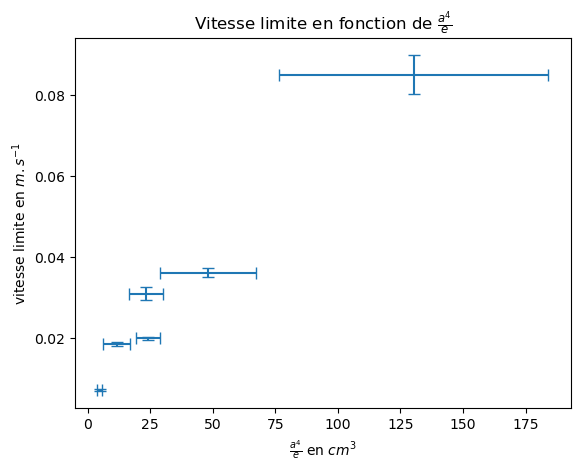

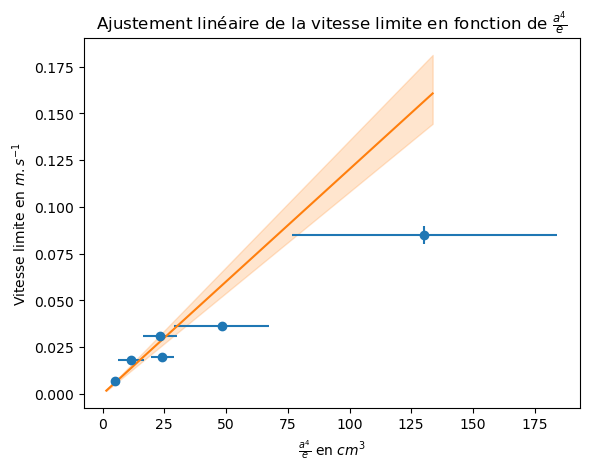

In [24]:
Ri = np.array([2.02, 3, 2.1, 3.8, Ri10*2, Ri11*2])/2
uR = np.ones(len(Ri))*(0.05/np.sqrt(3))
Re = np.array([2.2, 3.21 , 2.6, 4, Re10*2, Re11*2])/2
e = Re-Ri
ue = np.sqrt(2)*uR
v = np.array([v52, v62, v72, v82, v102/10, v112])
uv = np.array([uv52, uv62, uv72, uv82, uv102/10, uv112])
tab_x = (Ri**4)/e
tab_ux = tab_x*np.sqrt((ue/e)**2 + (4*uR/Ri)**2)

plt.figure()
plt.errorbar(x=tab_x, y=v, xerr=tab_ux, yerr=uv, fmt='none', capsize = 4)
plt.xlabel(r'$\frac{a^4}{e}$ en $cm^{3}$')
plt.ylabel('vitesse limite en $m.s^{-1}$')
plt.title('Vitesse limite en fonction de ' r'$\frac{a^4}{e}$')
res = fu.linfitxy(x=tab_x, y=v, dx=tab_ux, dy=uv, plot=True, intercept=False)
plt.xlabel(r'$\frac{a^4}{e}$ en $cm^{3}$')
plt.ylabel('Vitesse limite en $m.s^{-1}$')
plt.title('Ajustement linéaire de la vitesse limite en fonction de ' r'$\frac{a^4}{e}$')
plt.show()

In [25]:
print(e, Ri, v)

[0.09  0.105 0.25  0.1   0.23  0.145] [1.01  1.5   1.05  1.9   1.535 1.355] [0.01842546 0.03611111 0.00702629 0.08515284 0.01986982 0.0308642 ]


Conclusion : On voit que le graphique trouvé n'est pas vraiemnt celui attendu : la majorité des points sont en dessus de notre ajustement. On peut expliquer ca car on n'a pas consideré la force de frottement de l'air.

On considère maintenant les frottements de l'air. D'aprèes le PFD a l'équilibre on a :
$mg = kv_{lim} + \alpha v_{lim} \Rightarrow  \frac{1}{V} = \frac{\frac{36\pi f \sigma e \mu^2}{a^4}}{mg} + \frac{\alpha}{mg}$
On trace donc $\frac{1}{v}$ en fonction de $\frac{e}{a^4}$ et on devrait trouver une fonction affine de la forme $ax + b$ avec $a = \frac{36 \pi f \sigma \mu^2}{mg}$ et $b = \frac{\alpha}{mg}$

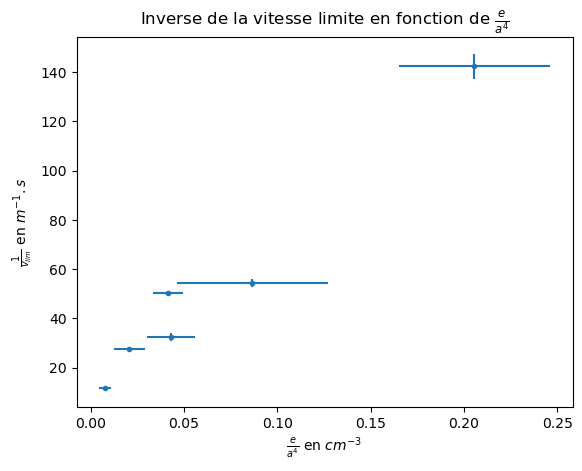

<Figure size 640x480 with 0 Axes>

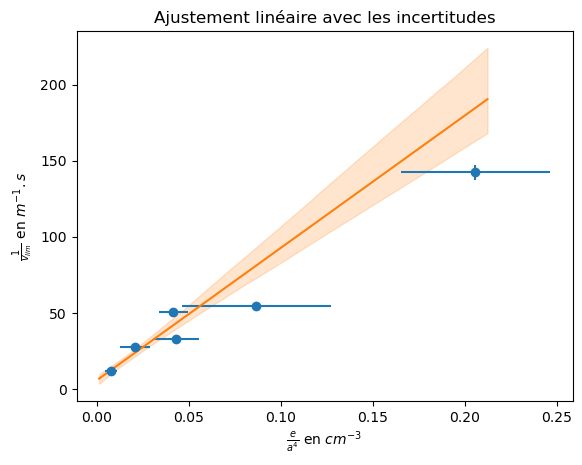

<Figure size 640x480 with 0 Axes>

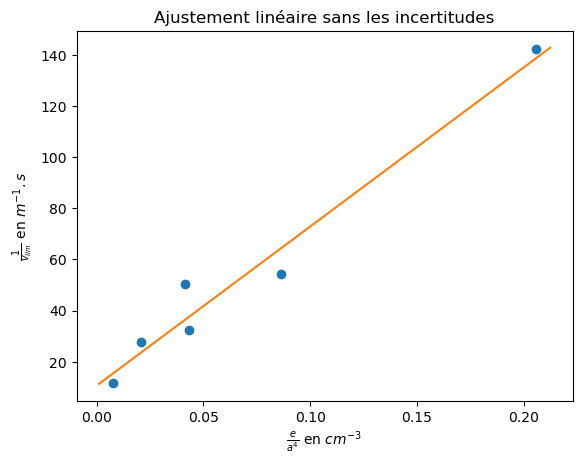

[623.07854822  10.63539832  58.90822987   5.24664234]


In [27]:
inv_v = 1/v
u_inv_v = inv_v**2 * uv
inv_x = 1/tab_x
u_inv_x = inv_x**2 *tab_ux

plt.figure()
plt.errorbar(x=inv_x, y=inv_v, yerr=u_inv_v, xerr=u_inv_x, fmt='.')
plt.xlabel(r'$\frac{e}{a^4}$ en $cm^{-3}$')
plt.ylabel(r'$\frac{1}{v_{lim}}$ en $m^{-1}.s$')
plt.title('Inverse de la vitesse limite en fonction de ' r'$\frac{e}{a^4}$')
plt.show()

plt.figure()
res2 = fu.linfitxy(x=inv_x, y=inv_v, dy=u_inv_v, dx=u_inv_x, plot=True, intercept=True)
plt.xlabel(r'$\frac{e}{a^4}$ en $cm^{-3}$')
plt.ylabel(r'$\frac{1}{v_{lim}}$ en $m^{-1}.s$')
plt.title('Ajustement linéaire avec les incertitudes')
plt.show()

plt.figure()
res3 = fu.linfitxy(x=inv_x, y=inv_v, plot=True, intercept=True)
plt.xlabel(r'$\frac{e}{a^4}$ en $cm^{-3}$')
plt.ylabel(r'$\frac{1}{v_{lim}}$ en $m^{-1}.s$')
plt.title('Ajustement linéaire sans les incertitudes')
plt.show()

On a tracé deux ajustements linéaires :
- le premier avec les incertitudes, et le modèle semble plus cohérent avec que qu'on attendait mais comme les incertitudes sont très grandes l'ajusement n'est pas tout a fait linéaire.
- le deuxième sans les incertitudes nous donne un graphique qui se rapproche beaucoup plus de tous les points, et qui nous montre bien qu'on peut considerer notre fonction comme une focntion affine.

## IV - Conclusion

Nous avons vu dans ce mini-projet que lors de la chute d'un aimant dans un tube conducteur on observait un freinage magnétique. En effet, le deplacement du champ magnétique de l'aimant crée un courant induit qui lui même génère un champ magnétique induit opposé au champs magnétique de l'aimant. Ce champ est a l'origine du freinage de l'aimant.

Avec nos differentes experiences nous avons avons pu voir quels étaient les paramètres qui avait de l'influence sur le freinage de l'aimant :
- la hauteur du tube n'a pas d'influence
- le materiau du tube a de l'influence sur le freinage : le cuivre étant plus conducteur le freinage était plus important que dans le laiton. Et dans les tubes non conducteurs on ne voyait pas de freinage.
- l'epaisseur du tube a une influence : plus le tube est epais plus le freinage sera important.
- le rayon du tube a une influence : plus le tube est etroit plus le freinage est important.
- l'aimant a une influence : s'il y a du plastique sur l'aimant, le freinage magnétique sera moins important. Aussi le moment magnétique de l'aimant a une influence sur la vitesse limite.

Aussi nous avons du que la vitesse limite verifie partiellement la formule :$v = \frac{a^4mg}{36\pi f \sigma e \mu^2}$ , et que dans notre cas, la vitesse limite verifie d'avantage la formule : $\frac{1}{V} = \frac{36\pi f \sigma e \mu^2}{a^4} \frac{1}{mg} + \frac{\alpha}{mg}$avec $\alpha$